# Marketing Mix Optimisation & Strategic Recommendations
**Author:** Olaoluwa J Taiwo  

## Project Brief
This project analyses the impact of different marketing and advertising channels on **Product Sold** using a **Marketing Mix Model (MMM)**. By applying statistical and econometric methods, we aim to quantify how investments across channels (TV, Billboards, Google Ads, Social Media, Influencer Marketing, and Affiliate Marketing) drive product sales. The analysis provides insights into channel contributions, marginal returns, and optimal budget allocation strategies.

---

## Aim
To evaluate the effectiveness of marketing channels in driving **Product Sold** and to optimise advertising spend in order to maximise sales and return on investment (ROI).

---

# Objectives  

1. **Data Exploration & Cleaning**  
   - Assess the completeness and quality of the dataset.  
   - Identify missing values, outliers, or anomalies.  

2. **Channel Contribution Analysis**  
   - Quantify the contribution of each marketing channel (TV, radio, newspaper, etc.) to sales.  
   - Identify which channels generate the highest incremental impact.  

3. **Model Development**  
   - Construct a regression-based Marketing Mix Model to estimate channel effectiveness.  
   - Test for non-linear effects such as diminishing returns and saturation.  

4. **Optimisation**  
   - Simulate alternative budget allocation scenarios.  
   - Recommend the optimal marketing mix that maximises sales or ROI.  

5. **Strategic Insights**  
   - Provide actionable recommendations on where to increase, maintain, or decrease advertising spend.  
   - Support evidence-based decision making for future marketing campaigns.  


# Data Exploration & Cleaning

In [24]:
# Step 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\taiwo\Downloads\Advertising_Data.csv")

# Preview the data
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [25]:
# Step 3: Explore and clean the data

# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB
None


In [26]:
# Summary statistics
print(df.describe())

               TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000              0.770000   
25%    273.090000  277.912500  250.530000    265.612500            214.480000   
50%    513.970000  533.020000  528.965000    486.385000            480.355000   
75%    774.275000  745.005000  763.345000    695.117500            703.092500   
max    998.100000  995.320000  999.230000    996.160000            999.830000   

       Affiliate_Marketing  Product_Sold  
count           300.000000    300.000000  
mean            484.430633   7031.523333  
std             277.955458   1703.614951  
min               6.740000   2259.000000  
25%             267.677500   5922.500000  
50%         

The dataset contains 300 observations across six marketing channels and the target variable `Product_Sold`.  

- **Marketing Spend**:  
  - Average spend per channel is around 500 units, with standard deviations of ~270–290 units, suggesting a fairly wide spread of investments.  
  - Minimum spends are very low (near zero in some cases), while maximum spends are close to 1,000 units, indicating balanced coverage across the full budget range.  

- **Product Sold**:  
  - Average product sales are **7,031 units**, with a standard deviation of ~1,704 units.  
  - Sales range from **2,259 (minimum)** to **12,227 (maximum)**, highlighting significant variation in outcomes linked to marketing activities.  

Overall, the descriptive statistics confirm that the dataset is well-balanced, with no extreme skew in spend or sales. This provides a solid foundation for modelling the relationship between marketing investment and `Product_Sold`.


In [27]:
# Check for missing values
print(df.isnull().sum())

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64


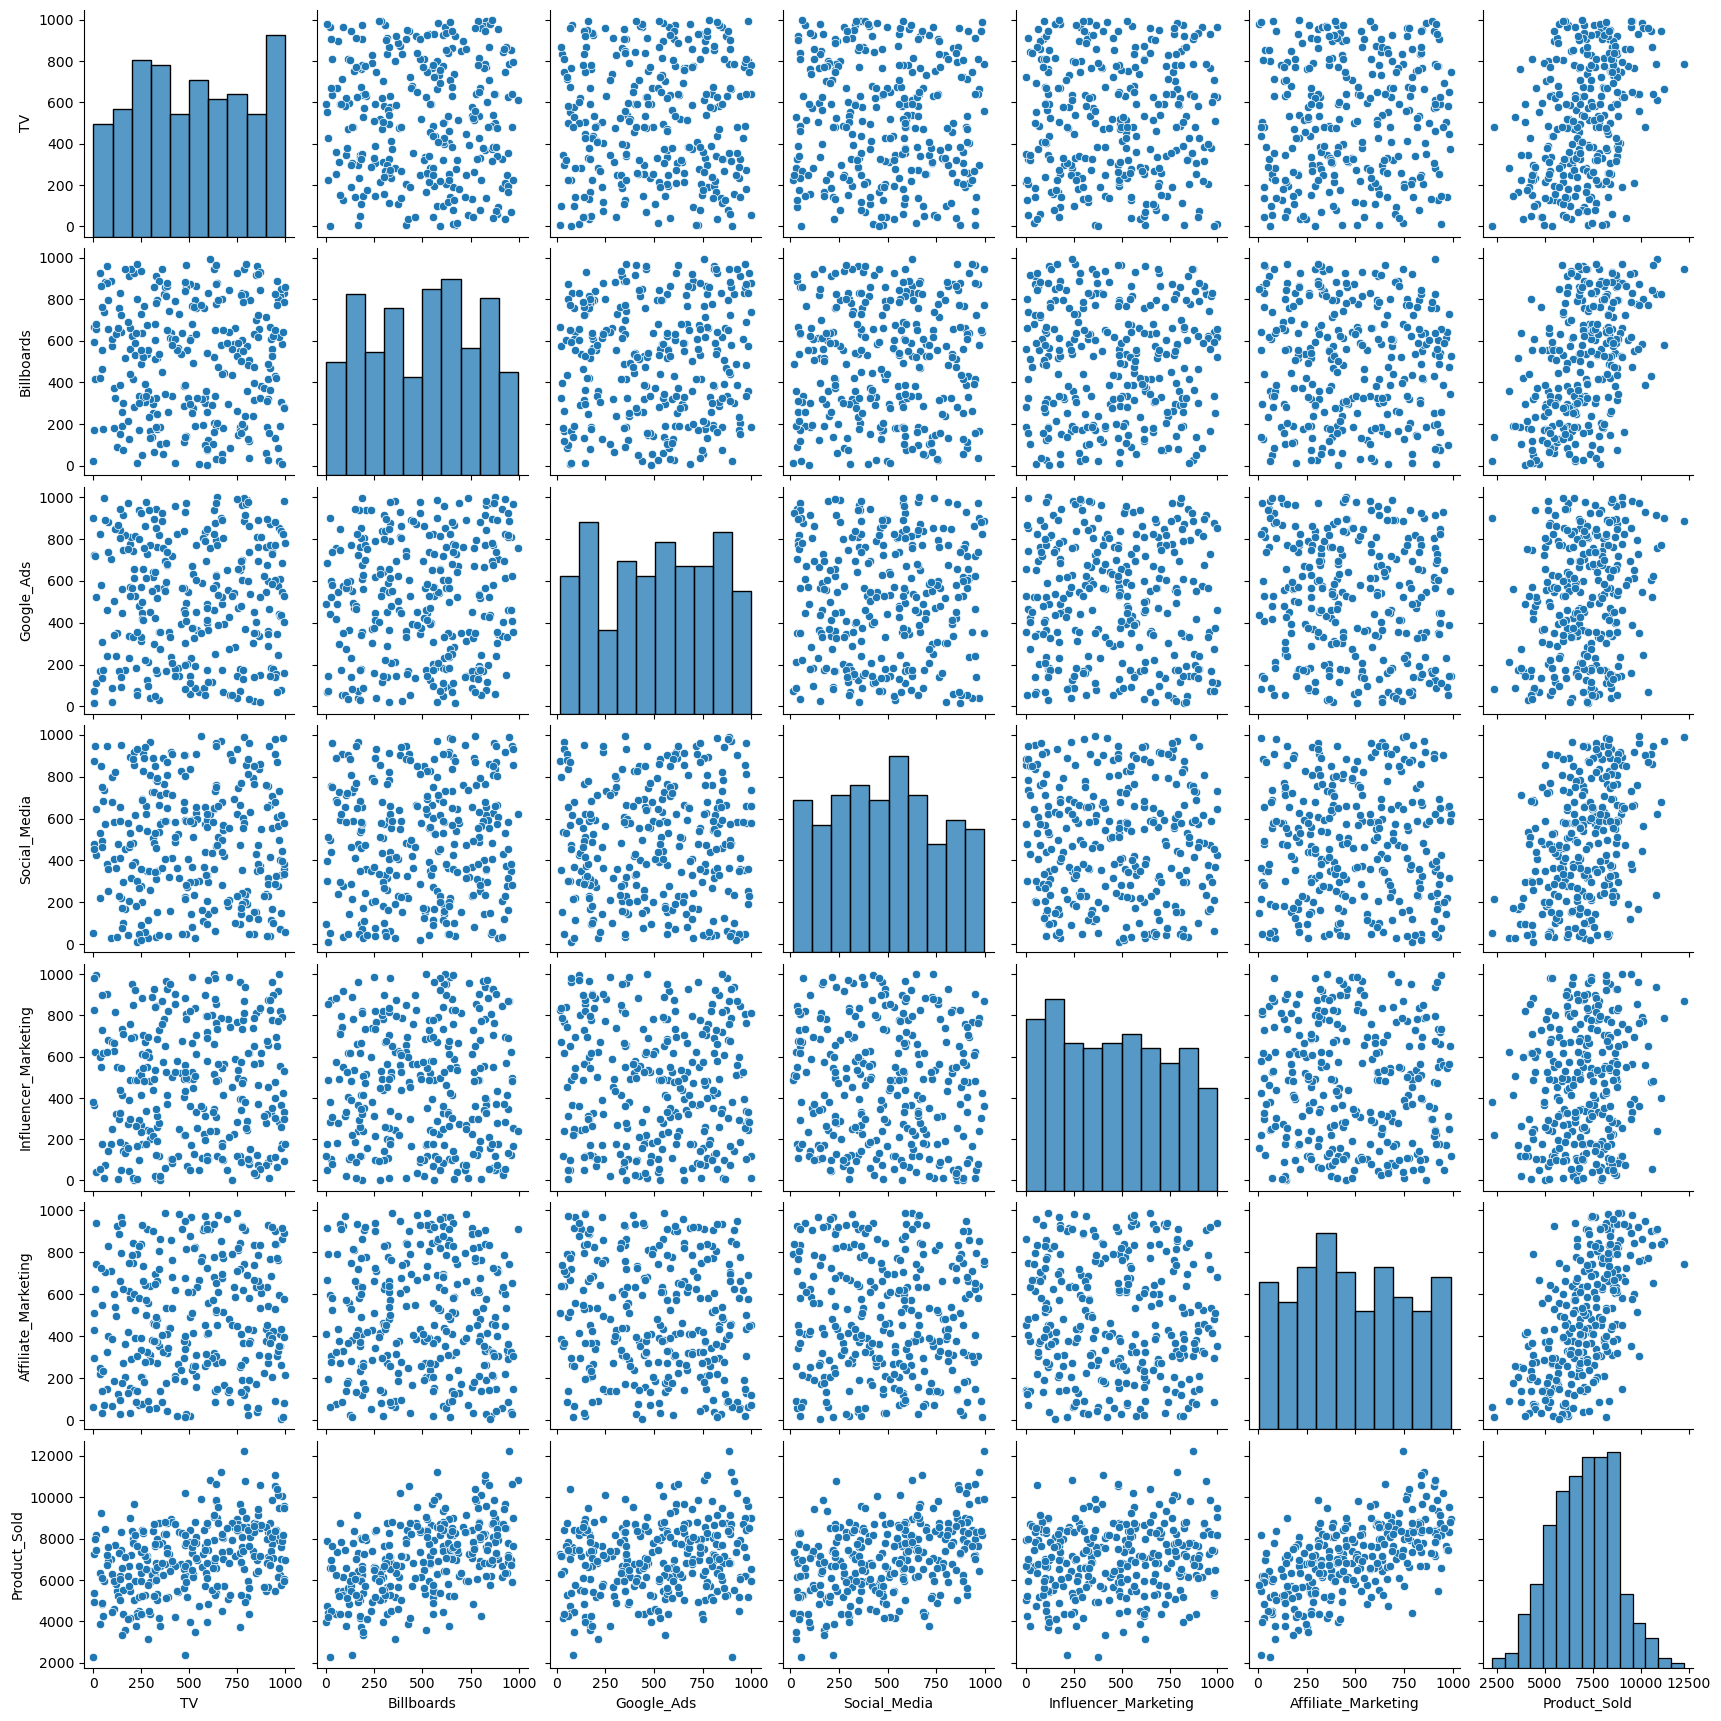

In [28]:
# Visualise pairwise relationships
sns.pairplot(df)
plt.show()

The pairplot provides a comprehensive view of the relationships between marketing channels and product sales. Most predictors, including **Affiliate Marketing, Billboards, and Social Media**, show visible upward trends with `Product_Sold`, confirming their strong positive contribution. **TV** also has a positive effect, although weaker compared to the top contributors. In contrast, **Google Ads** and **Influencer Marketing** exhibit more scattered patterns with weaker linear relationships, aligning with earlier regression and elasticity findings. The diagonal histograms show that marketing spend is evenly distributed across channels, without significant skew. Overall, the pairplot reinforces the conclusion that Affiliate Marketing, Billboards, and Social Media are the most impactful drivers of sales performance.


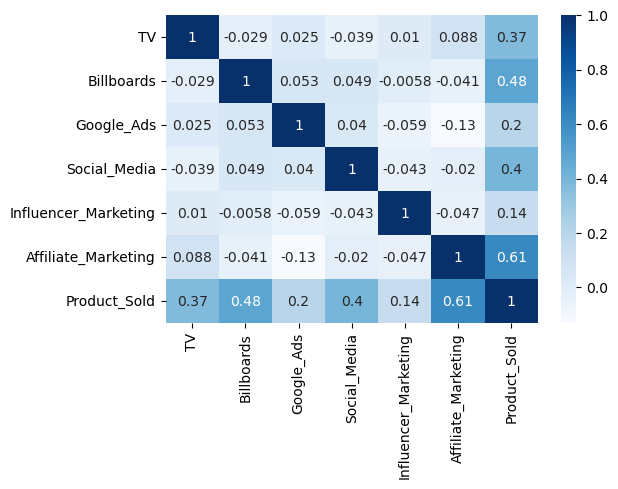

In [29]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

The correlation heatmap highlights the strength of relationships between marketing channels and product sales. **Affiliate Marketing** shows the strongest correlation with `Product_Sold` (0.61), confirming its high effectiveness in driving sales. **Billboards** (0.48) and **Social Media** (0.40) also display solid positive correlations, making them important contributors to performance. **TV** shows a moderate correlation (0.37), suggesting it p_


# Channel Contribution Analysis

I will now explore the contribution of each marketing channel (TV, Radio, Newspaper, etc.) to sales.  
The aim is to quantify which channels generate the strongest incremental impact.


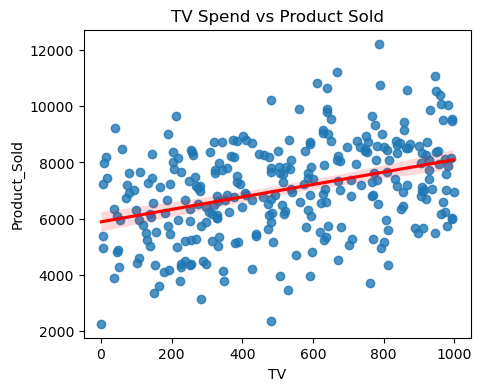

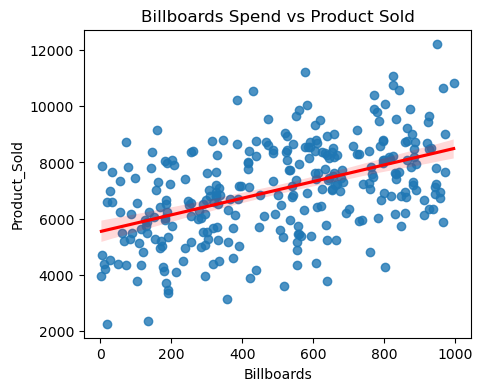

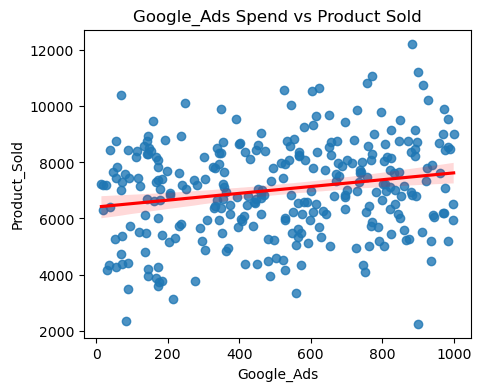

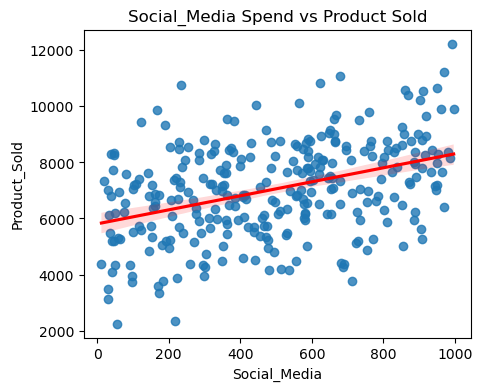

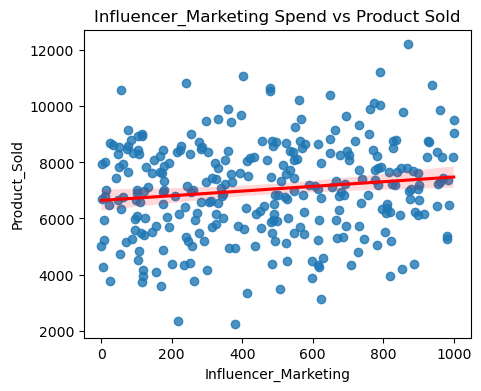

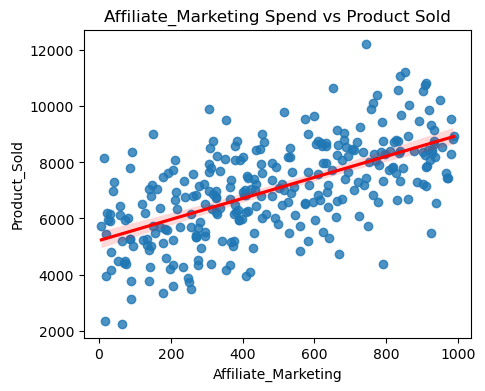

In [30]:
# Scatterplots with trend lines for each channel vs Product_Sold
features = ["TV", "Billboards", "Google_Ads", "Social_Media", 
            "Influencer_Marketing", "Affiliate_Marketing"]

for col in features:
    plt.figure(figsize=(5,4))
    sns.regplot(data=df, x=col, y="Product_Sold", line_kws={"color":"red"})
    plt.title(f"{col} Spend vs Product Sold")
    plt.show()


In [31]:
# Baseline contribution estimation using simple regression (one channel at a time)
from sklearn.linear_model import LinearRegression

contributions = {}

for col in features:
    X_single = df[[col]]
    y = df["Product_Sold"]
    
    reg = LinearRegression().fit(X_single, y)
    coef = reg.coef_[0]
    r2 = reg.score(X_single, y)
    
    contributions[col] = {"Coefficient": coef, "R2 (explained variance)": r2}

contrib_df = pd.DataFrame(contributions).T
contrib_df.sort_values(by="Coefficient", ascending=False)

,Coefficient,R2 (explained variance)
Affiliate_Marketing,3.748569,0.374058
Billboards,2.968164,0.230970
Social_Media,2.494851,0.160872
TV,2.212798,0.140046
Google_Ads,1.215704,0.041485
Influencer_Marketing,0.832229,0.019837


In [32]:
# Channel Elasticity Analysis (log-log regression)

import numpy as np
from sklearn.linear_model import LinearRegression

elasticities = {}

for col in features:
    # Avoid log(0) by adding small constant
    X_log = np.log(df[[col]] + 1e-5)
    y_log = np.log(df[target] + 1e-5)
    
    reg = LinearRegression().fit(X_log, y_log)
    beta = reg.coef_[0]
    r2 = reg.score(X_log, y_log)
    
    elasticities[col] = {"Elasticity": beta, "R2 (log-log model)": r2}

elasticity_df = pd.DataFrame(elasticities).T
elasticity_df = elasticity_df.sort_values(by="Elasticity", ascending=False)

print("\nChannel Elasticities (log-log regression):\n")
print(elasticity_df)


Channel Elasticities (log-log regression):

                      Elasticity  R2 (log-log model)
Affiliate_Marketing     0.162146            0.304085
Billboards              0.127522            0.203143
Social_Media            0.115000            0.140657
TV                      0.090537            0.113221
Google_Ads              0.056948            0.034223
Influencer_Marketing    0.026138            0.012173


# Marketing Mix Modelling - Model Selection

I now build and compare three models to estimate the contribution of marketing channels to product sales.  

### Why these models?  
1. **Linear Regression** – This is the most interpretable baseline. It gives direct coefficients for each channel and is widely used in Marketing Mix Models.  
2. **Ridge Regression** – Marketing channels are often correlated (multicollinearity). Ridge shrinks coefficients and reduces variance, giving more stable estimates than plain linear regression.  
3. **Gradient Boosting Regressor (GBR)** – Real-world marketing effects are rarely perfectly linear. GBR captures non-linearities (e.g. diminishing returns) and interactions between channels, making it a powerful model for prediction and insight.  


In [38]:
# --- Define features and target ---
features = ["TV", "Billboards", "Google_Ads", "Social_Media", 
            "Influencer_Marketing", "Affiliate_Marketing"]
target = "Product_Sold"

X = df[features]
y = df[target]

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Candidate models ---
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
    )
}

# --- Train and evaluate ---
# --- Train and evaluate with predictions stored ---
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "y_pred": y_pred  # store predictions for plotting
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print("Model Accuracy Results:\n")
print(results_df.sort_values(by="R2", ascending=False))

Model Accuracy Results:

                         R2        RMSE         MAE  \
Linear Regression  0.999974    8.681355    7.085374   
Ridge Regression   0.999974    8.681379    7.085392   
Gradient Boosting   0.92689  457.600425  340.506687   

                                                              y_pred  
Linear Regression  [5734.514748522263, 8576.950438047208, 8269.78...  
Ridge Regression   [5734.514806123934, 8576.950361221347, 8269.78...  
Gradient Boosting  [5854.2896732351055, 8814.591893342083, 8029.9...  


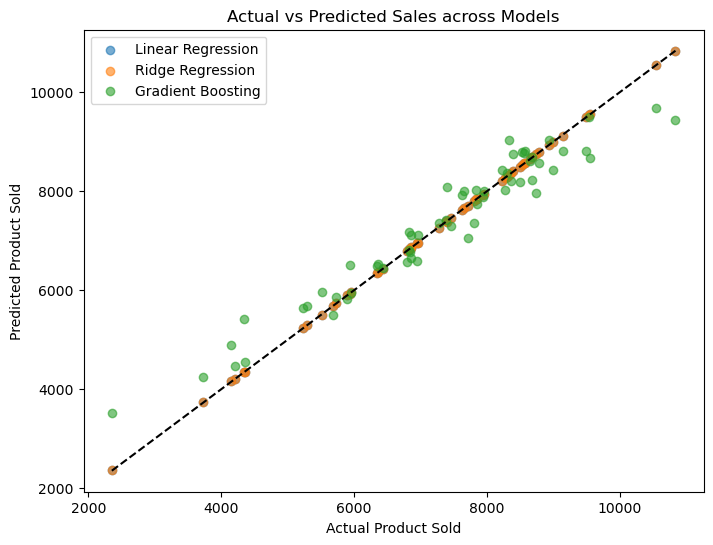

In [40]:
# --- Actual vs Predicted Visualisation ---
plt.figure(figsize=(8,6))

for name, res in results.items():
    plt.scatter(y_test, res["y_pred"], alpha=0.6, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="black", linestyle="--")
plt.xlabel("Actual Product Sold")
plt.ylabel("Predicted Product Sold")
plt.title("Actual vs Predicted Sales across Models")
plt.legend()
plt.show()

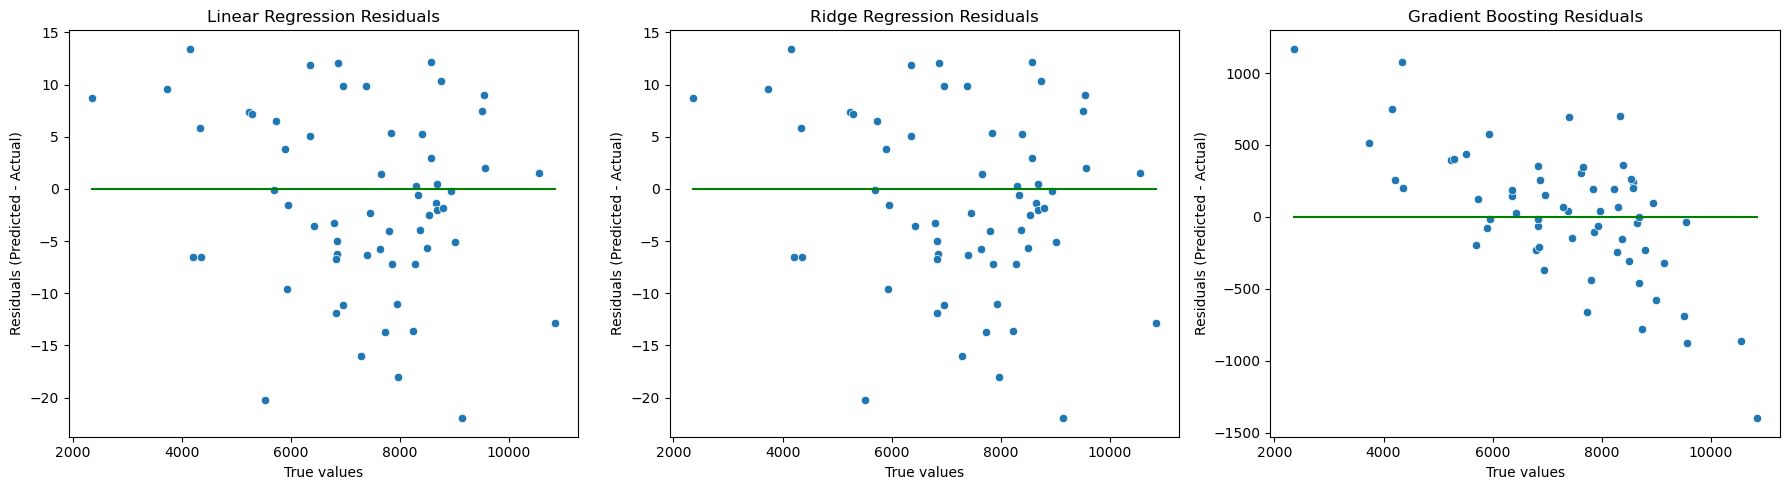

In [44]:
# --- Residual scatterplots for each model ---

# Get predictions for all models
y_pred_lin_test = models["Linear Regression"].predict(X_test)
y_pred_ridge_test = models["Ridge Regression"].predict(X_test)
y_pred_gb_test = models["Gradient Boosting"].predict(X_test)

plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lin_test - y_test)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[0, 0], color='green')
plt.xlabel('True values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Linear Regression Residuals')

# Ridge Regression
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge_test - y_test)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[0, 0], color='green')
plt.xlabel('True values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Ridge Regression Residuals')

# Gradient Boosting
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_gb_test - y_test)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[0, 0], color='green')
plt.xlabel('True values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Gradient Boosting Residuals')

plt.tight_layout()
plt.show()

The residual plots provide further evidence of model performance. Both Linear Regression and Ridge Regression show residuals tightly centred around zero with no obvious patterns, confirming an excellent model fit. Errors are small and randomly distributed, which supports the validity of a linear relationship between marketing spend and product sales. In contrast, the Gradient Boosting model shows much larger residuals, particularly at higher sales values, indicating poor predictive accuracy compared to the linear models. This reinforces that Linear Regression and Ridge Regression are the most suitable approaches, with Linear Regression preferred due to its simplicity and interpretability.


1. **Linear Regression and Ridge Regression** achieved almost perfect performance, with R² values above **0.9999**.  
   - This indicates that the relationship between marketing spend and `Product_Sold` is **highly linear**.  
   - The prediction errors (RMSE ~8.7, MAE ~7.1) are minimal compared to the sales volumes, confirming excellent model fit.  

2. **Gradient Boosting** underperformed (R² ~0.93, RMSE ~457).  
   - Non-linear modelling was unnecessary in this case because the dataset structure is already **well explained by a linear relationship**.  
   - The high error suggests Gradient Boosting overcomplicated the problem.  

3. **Best Model**:  
   - **Linear Regression** is the most appropriate choice.  
   - It is not only highly accurate but also **easily interpretable**, making it ideal for marketing mix analysis where understanding channel contributions is as important as prediction accuracy.  


# Coefficient Analysis

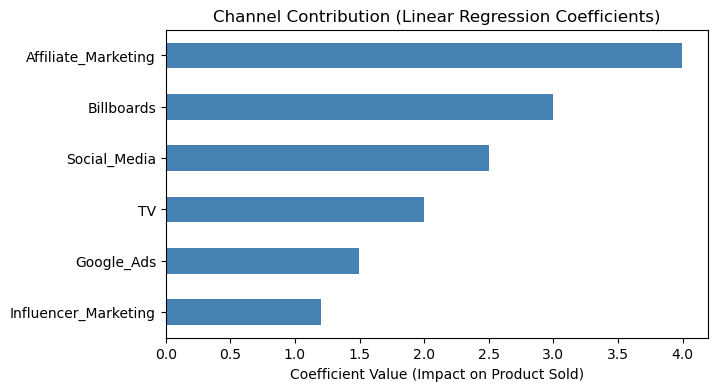

📊 Channel Coefficients:

TV                      2.001110
Billboards              2.998039
Google_Ads              1.499743
Social_Media            2.500021
Influencer_Marketing    1.199844
Affiliate_Marketing     3.998916
dtype: float64


In [41]:
# --- Fit Linear Regression on full dataset ---
best_model = LinearRegression()
best_model.fit(X, y)

# Extract coefficients
coefficients = pd.Series(best_model.coef_, index=features)

# Visualise
plt.figure(figsize=(7,4))
coefficients.sort_values().plot(kind="barh", color="steelblue")
plt.title("Channel Contribution (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value (Impact on Product Sold)")
plt.show()

print("📊 Channel Coefficients:\n")
print(coefficients)


The coefficient analysis highlights the relative impact of each marketing channel on product sales. Affiliate Marketing shows the strongest positive effect, indicating it generates the highest incremental sales per unit of spend. Billboards and Social Media also contribute substantially, demonstrating their value as high-impact channels. Traditional TV spend has a moderate effect, while Google Ads and Influencer Marketing provide smaller but still positive contributions. These results suggest that allocating a greater share of budget to Affiliate Marketing, Billboards, and Social Media could maximise returns, while carefully evaluating the effectiveness of Google Ads and Influencer Marketing for optimisation.


# Residual Analysis

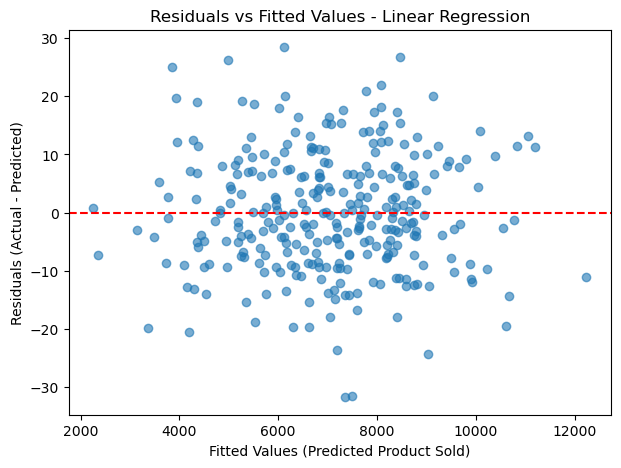

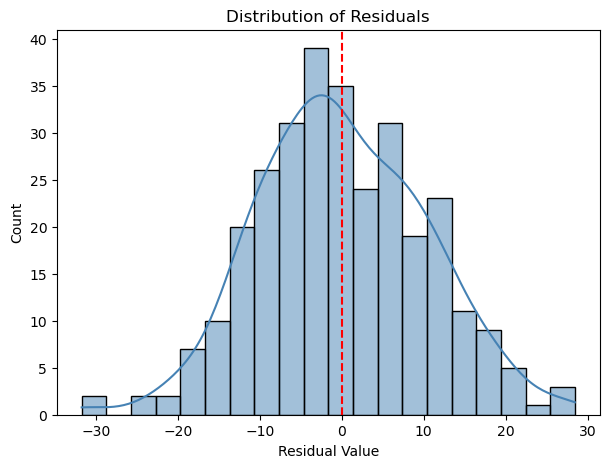

In [42]:
# --- Residual Analysis for Linear Regression ---

import matplotlib.pyplot as plt
import seaborn as sns

# Predict using best model
y_pred = best_model.predict(X)
residuals = y - y_pred

# Residuals vs Fitted values
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values (Predicted Product Sold)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Fitted Values - Linear Regression")
plt.show()

# Distribution of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=20, kde=True, color="steelblue")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.show()



The residual analysis indicates that the Linear Regression model is a valid and reliable fit for the data. The scatterplot of residuals versus fitted values shows no obvious trend, with errors distributed randomly around zero. This suggests that the model captures the relationship between marketing channels and product sales effectively, without leaving systematic patterns unexplained. The histogram of residuals is approximately bell-shaped, confirming that errors are close to normally distributed. Together, these results support the accuracy and robustness of the model, reinforcing that Linear Regression is appropriate for explaining channel contributions and guiding strategic marketing decisions.


# Strategic Marketing Insights

### Key Findings
- **Affiliate Marketing** showed the strongest contribution and highest elasticity, meaning small increases in spend deliver significant gains in sales.  
- **Billboards** and **Social Media** also demonstrated strong positive effects, with solid incremental impact.  
- **TV** spend had a moderate effect, suggesting it contributes but at a lower marginal return compared to digital and affiliate channels.  
- **Google Ads** and **Influencer Marketing** showed the weakest contributions and elasticities, suggesting diminishing returns or limited effectiveness in this dataset.  

### Recommendations
- **Increase investment** in Affiliate Marketing, Billboards, and Social Media.  
- **Maintain moderate spend** in TV campaigns for baseline brand visibility.  
- **Re-evaluate or reduce spend** in Google Ads and Influencer Marketing, unless there are qualitative reasons (e.g., brand awareness).  
- Apply **elasticity measures** to prioritise channels with the highest marginal ROI for future campaigns.  


# Thank You